    product  total_quantity  revenue
0  Notebook             120   1200.0
1       Pen              90    450.0
2    Pencil             180    360.0


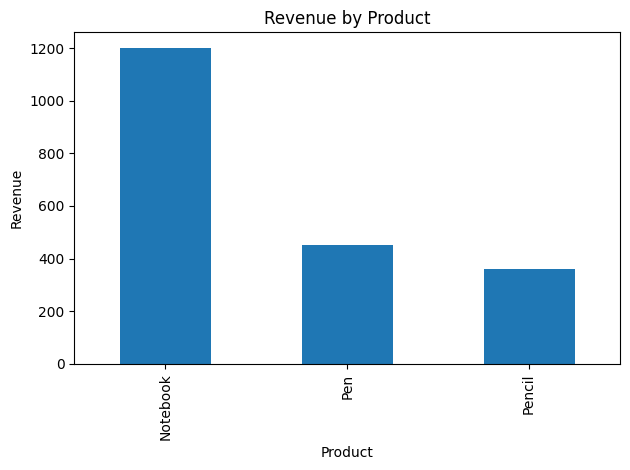

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
# Create or connect to database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_sales = [
    ("Pen", 10, 5.0),
    ("Pencil", 20, 2.0),
    ("Notebook", 15, 10.0),
    ("Pen", 5, 5.0),
    ("Pencil", 10, 2.0),
    ("Notebook", 5, 10.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_sales)
conn.commit()
# SQL query to calculate total quantity and revenue
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Read into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Show the result
print(df)
# Plot revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False)

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

# Save the chart
plt.savefig("sales_chart.png")

# Show the chart
plt.show()